# Отчет - домашнее задание

# Корепанова Дарья Владимировна, группа ПЭ-2, Вариант 13

# 1 Опишите вашу выборку. Что является в Вашем случае генеральной совокупностью? Как можно проверить репрезентативность Вашей выборки?

In [1]:
import pandas as pd
import numpy as np

In [485]:
data = pd.read_csv('data.csv')
headers = data.columns.values

In [486]:
tmp = map(lambda i: 'id{}'.format(i), [i for i in range(1, 77)])
tmp = tmp[:12] + tmp[13:]
data = data.drop(np.array(tmp), axis=1)

In [487]:
s = np.where(data.loc[:, ['id13']] == 0)
data = data.drop(s[0])
data = data.dropna(axis=0)
data = data.drop(['id13'], axis = 1)

Выборка составлена из индивидов,находящихся в трудоспособном возрасте, по результатам опроса населения РМЭЗ в 2007 году в Пензенской области, Земетчинском районе.
В данном районе проживает более 21000 человек, а размер данной выборки составляет всего 61 индивид, что точно не может отражать действительные результаты(с учетом удаленных пропусков).

Генеральную совокупность в данном случае представляют все дееспособные индивиды.

* Возраст респондентов распределен примерно одинаково, от 22 до 59 лет.
* Невысокие заработные платы, около 3000 р.
* В основном у всех есть среднее образование и пройдены профессиональные курсы, у единиц - высшее.
* Признак показывает,что опрошены только жители сёл, хотя  по данным из Википедии, данный район включает в себя 1 городское и 10 сельских поселений.
* Большая часть опрошенных - это женщины.

# 2 Рассчитайте описательные статистики (минимум, максимум, среднее значение, стандартное отклонение, размах) для всех переменных в Вашей выборке.

In [400]:
X = data.describe().drop(['25%', '50%', '75%'])

print(X)

               wage       income        age       male       educ     public  \
count     61.000000     61.00000  61.000000  61.000000  61.000000  61.000000   
mean    3951.180328   4027.57377  37.868852   0.459016   2.491803   0.655738   
std     3106.320382   3071.12516   8.120910   0.502453   2.118356   0.479070   
min      700.000000    770.00000  22.000000   0.000000   0.000000   0.000000   
max    18000.000000  18000.00000  59.000000   1.000000   5.000000   1.000000   

          tenure  experience  subordinates   otherjob   internet      trust  \
count  61.000000   61.000000     61.000000  61.000000  61.000000  61.000000   
mean    7.409836   15.295082      0.163934   0.098361   0.016393   0.114754   
std     7.906489    9.098249      0.373288   0.300273   0.128037   0.321370   
min     0.000000    1.000000      0.000000   0.000000   0.000000   0.000000   
max    35.000000   40.000000      1.000000   1.000000   1.000000   1.000000   

       urban  
count     61  
mean       0  

In [401]:
minn = data.min(axis=0)
maxx = data.max(axis=0)
mean = data.mean(axis=0)
std = data.std(axis=0)
difference = maxx - minn
print('difference:\n {}'.format(difference))

difference:
 wage            17300
income          17230
age                37
male                1
educ                5
public              1
tenure             35
experience         39
subordinates        1
otherjob            1
internet            1
trust               1
urban               0
dtype: float64


# 3 Оцените квартили (25%, 50%, 75%) распределения для непрерывных переменных в выборке. Определите межквартильный размах

Квантиль порядка p - это такое число $x_p$, что $P(X < x_p) = p$. квартили - $0.25, 0.5, 0.75$

In [488]:
X = data.loc[:, ['wage', 'income', 'tenure', 'age', 'experience']]
X = X.as_matrix()
percentile25 = np.percentile(X, 25, axis=0)
percentile50 = np.percentile(X, 50, axis=0)
percentile75 = np.percentile(X, 75, axis=0)
print('                     wage    income   tenure age    experience')
print('percentile25:       {}\n\npercentile50:       {}\n\npercentile75:       {}\n\nmezkvartilny_razmah:{}'.format(percentile25, percentile50, percentile75, percentile75 - percentile25))

                     wage    income   tenure age    experience
percentile25:       [ 2000.  2000.     2.    33.    10.]

percentile50:       [ 3000.  3340.     5.    36.    15.]

percentile75:       [ 5000.  5000.    12.    41.    18.]

mezkvartilny_razmah:[ 3000.  3000.    10.     8.     8.]


# 4 Сравните среднее значение, медиану и моду для непрерывных переменных в выборке и для переменной образования. Что можно сказать об их соотношении?

In [419]:
import scipy.stats as st
mediana = np.median(X, axis=0)
moda = st.mode(X, axis=0)
mean = np.mean(X, axis=0)
mean_educ = np.mean(data['educ'].as_matrix())
moda_educ = st.mode(data['educ'].as_matrix())
mediana_educ = np.median(data['educ'].as_matrix())
print('Features:wage    income    tenure    age    experience\n')
print('mean:   {}\n \nmediana:{} \n \nmode:   {}\n \n'.format(mean, mediana, moda[0][0]))
print('Educ\n')
print('mean:{}\n \nmediana:{}\n \nmode:{} \n \n'.format(mean_educ, mediana_educ, moda_educ[0][0]))

Features:wage    income    tenure    age    experience

mean:   [ 3951.18032787  4027.57377049     7.40983607    37.86885246    15.29508197]
 
mediana:[ 3000.  3340.     5.    36.    15.] 
 
mode:   [ 3000.  3000.     5.    34.    16.]
 

Educ

mean:2.49180327869
 
mediana:3.0
 
mode:0.0 
 



1)Зарплаты в освновном месте работы:

в основном люди получают зарплату примерно 3000, так как медиана 3000, мода 3 тыс. Среднее значение сильно отличаеися(3951) из-за выбросов.

2)Общие ежемесячные доходы:

в основном люди получают зарплату примерно 3000 и больше, так как медиана 3340, мода 3000. Из-за выбросов среднее значение сильно отличается(4027).

3)Опыт работы на текущем месте:

в основном люди работают около 5 лет на данном месте(медиана и мода равны 5), однако есть те, кто уже работает около 7 лет и больше(среднее значение 7.409).

4)Возраст:

приблизительно одинаковый(в основном колеблется от 34 до 38).

5)Образование:

большая часть людей не имеет образования, так как мода 0. А в среднем это профессиональные курсы или
ПТУ, техническое училище(так как медиана 3, а среднее около 2).


6)Стаж: Большинство людей имеют большой опыт работы (медиана равна 18, мода равна 5)

# 5 Постройте box-plot для всех непрерывных переменных. Есть ли выбросы?

In [420]:
import matplotlib.pyplot as plt

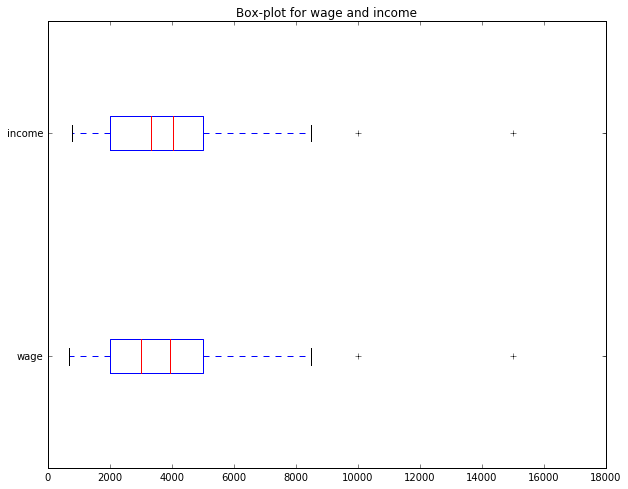

In [423]:
plt.figure(figsize=(10, 8))
plt.title('Box-plot for wage and income')
x_2 = np.transpose(X)
x_2 = x_2[:2].transpose()
a = plt.boxplot(x_2, meanline=True, showmeans=True, vert=False, labels=['wage', 'income'], showfliers=True)
plt.show()

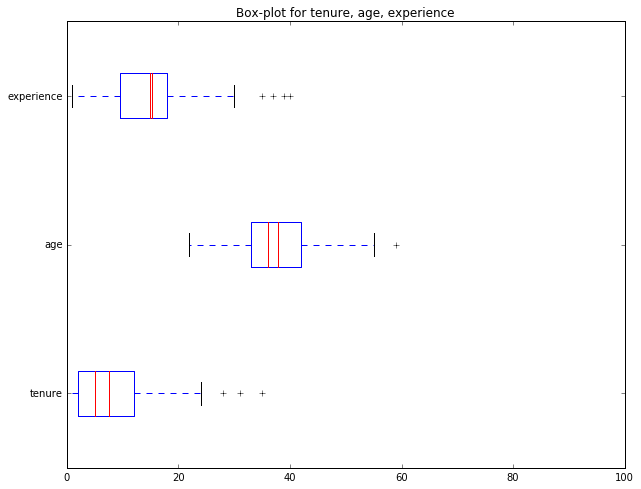

In [424]:
plt.figure(figsize=(10, 8))
plt.title('Box-plot for tenure, age, experience')
x_3 = np.transpose(X)
x_3 = x_3[2:].transpose()
plt.boxplot(x_3[2:], meanline=True, showmeans=True, labels=['tenure', 'age', 'experience'], showfliers=True, vert=False)
plt.xlim([0, 100])
plt.show()

Видно, что для каждого признака есть небольшие выбросы, больше всего для общего стажа работы и на последнем рабочем месте.

# 6 Постройте гистограммы распределения для непрерывных переменных в выборке. Что можно сказать о скошенности и асимметричности их распределений? Рассчитайте соответствующие показатели и сделайте выводы.

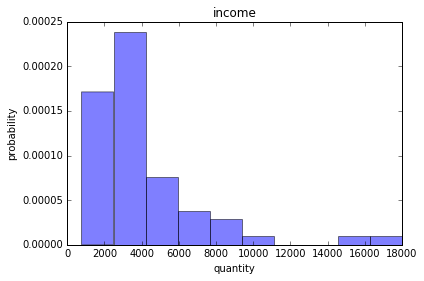

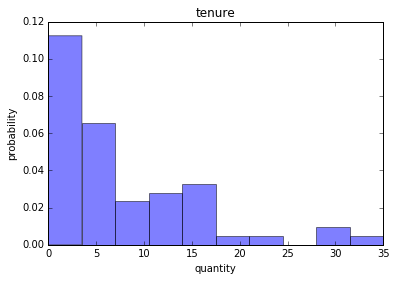

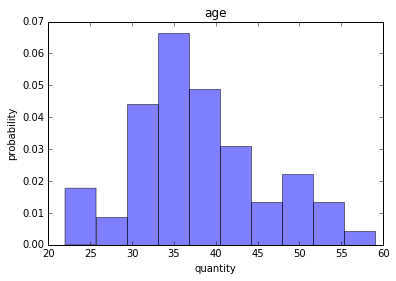

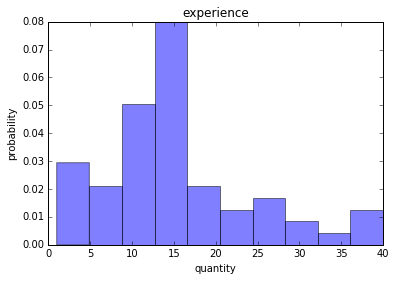

In [467]:
plt.title('wage')
plt.ylabel('probability')
plt.xlabel('quantity')
plt.hist(X[:, 0], normed=True, alpha=0.5)
plt.show()

plt.title('income')
plt.ylabel('probability')
plt.xlabel('quantity')
plt.hist(X[:, 1], normed=True, alpha=0.5)
plt.show()

plt.title('tenure')
plt.ylabel('probability')
plt.xlabel('quantity')
plt.hist(X[:, 2], normed=True, alpha=0.5)
plt.show()

plt.title('age')
plt.ylabel('probability')
plt.xlabel('quantity')
plt.hist(X[:, 3], normed=True, alpha=0.5)
plt.show()

plt.title('experience')
plt.ylabel('probability')
plt.xlabel('quantity')
plt.hist(X[:, 4], normed=True, alpha=0.5)
plt.show()

In [483]:
import scipy.stats as st

print('Коэффициенты асимметрии и эксцесса:')
print('          wage         income      tenure      age         experience')
print('skew:    {}'.format(st.skew(X)))
print('kurtosis:{}'.format(st.kurtosis(X)))

Коэффициенты асимметрии и эксцесса:
          wage         income      tenure      age         experience
skew:    [ 2.4263462   2.46197054  1.59834326  0.43812876  0.87530072]
kurtosis:[ 7.41801302  7.62660025  2.37631324 -0.0555733   0.55963116]


1) Зарплаты на основном месте работы:

* перекос гистограммы влево, коэффициент асимметричности больше нуля.
* резкий перепад значений по оси ОУ, коэффициент эксцесса больше нуля.

2) Общие ежемесячные доходы:

* перекос гистограммы влево, коэффициент асимметричности больше нуля.
* резкий перепад значений по оси ОУ, коэффициент эксцесса больше нуля.

3) Опыт работы на текущем месте:

* достаточный перекос влево, коэффициент асимметрии больше нуля.
* резкий перепад значений по оси ОУ, коэффициент эксцесса достаточно больше нуля.

4) Возраст:

* небольшой перекос влево, коэффициент асимметрии чуть больше нуля.
* резких перепадов практически нет, коэффициент эксцесса чуть меньше нуля.

5) Стаж:

* перекосапочти нет, коэффициент асимметрии немного больше нуля.
* резких перепадова практически нет, коэффициент эксцесса немного больше нуля.

# 7 Постройте 95% и 99% доверительные интервалы для математического ожидания и стандартного отклонения генеральной совокупности для непрерывных переменных.

In [463]:
from scipy.stats import t

std = np.std(X, axis=0)
mean = np.mean(X, axis=0)

alpha = 0.05
print('features:{}'.format(' wage            income           tenure         age           experience'))
print('mean:  {}\n'.format(mean))
ppf = t.ppf(1 - alpha / 2, X.size - 1)
ppf = ppf * std / np.sqrt(X.size)
print('95% confidence intervals for mean:\nfrom:  {}\nto:    {}\n'.format( (mean - ppf).reshape(-1, mean.size)[0],  (mean + ppf).reshape(-1, mean.size)[0]))

alpha = 0.01
ppf = t.ppf(1 - alpha / 2, X.size - 1)
ppf = ppf * std / np.sqrt(X.size)
print('99% confidence intervals for mean:\nfrom:  {}\nto:    {}\n'.format((mean - ppf).reshape(-1, mean.size)[0], (mean + ppf).reshape(-1, mean.size)[0]))


from scipy.stats import chi2
      
alpha = 0.05
print('std:   {}\n'.format(std))
ppf = chi2.ppf(1 - alpha / 2, X.size - 1)
left, right = chi2.ppf(1 - alpha / 2, X.size - 1), chi2.ppf(alpha / 2, X.size - 1)
left = std*np.sqrt(X.size - 1) / np.sqrt(left)
right = std*np.sqrt(X.size - 1) / np.sqrt(right)
print('95% confidence intervals for std:\nfrom:  {}\nto:    {}\n'.format(left.reshape(-1, left.size)[0], right.reshape(-1, right.size)[0]))

alpha = 0.01
ppf = chi2.ppf(1 - alpha / 2, X.size - 1)
left, right = chi2.ppf(1 - alpha / 2, X.size - 1), chi2.ppf(alpha / 2, X.size - 1)
left = std*np.sqrt(X.size - 1) / np.sqrt(left)
right = std*np.sqrt(X.size - 1) / np.sqrt(right)
print('99% confidence intervals for std:\nfrom:  {}\nto:    {}\n'.format(left.reshape(-1, left.size)[0], right.reshape(-1, right.size)[0]))



features: wage            income           tenure         age           experience
mean:  [ 3951.18032787  4027.57377049     7.40983607    37.86885246    15.29508197]

95% confidence intervals for mean:
from:  [ 3604.0539791   3684.38043167     6.52629853    36.96135371    14.27836711]
to:    [ 4298.30667664  4370.76710931     8.2933736     38.77635121    16.31179683]

99% confidence intervals for mean:
from:  [ 3493.92530696  3575.4995391      6.24598902    36.67344231    13.95580601]
to:    [ 4408.43534877  4479.64800189     8.57368311    39.06426261    16.63435793]

std:   [ 3080.75352454  3045.8479799      7.84141391     8.05407017     9.02336541]

95% confidence intervals for std:
from:  [ 2854.12737011  2821.78954448     7.26458442     7.46159727     8.3595893 ]
to:    [ 3346.77558153  3308.85595455     8.51851743     8.74953648     9.80253006]

99% confidence intervals for std:
from:  [ 2787.74133687  2756.15567808     7.09561266     7.28804306     8.16514809]
to:    [ 3437.0167

# 8 Постройте 90% и 95% доверительный интервал для доли женщин в генеральной совокупности

In [489]:
from scipy.stats import norm

alpha = 0.1
N = X.size
female = N - data['male'].sum()
p = female * 1.0 / N
ppf = norm.ppf(1 - alpha / 2)
print('90% confidence interval:\n[{}, {}]\n'.format(p - ppf*np.sqrt(p * (1 - p) / N), p + ppf * np.sqrt(p * (1 - p) / N)))

90% confidence interval:
[0.88100126201, 0.935392180613]



In [490]:
alpha = 0.05
ppf = norm.ppf(1 - alpha / 2)
print('95% confidence interval:\n[{}, {}]\n'.format(p - ppf*np.sqrt(p * (1 - p) / N), p + ppf * np.sqrt(p * (1 - p) / N)))

95% confidence interval:
[0.875791332831, 0.940602109792]



# 9 Проверьте гипотезу, что матожидание среднего дохода равно 9000 рублей против двусторонней альтернативной гипотезы.

Пусть $\mu = 9000$.
Будем считать, что: $$H_0: \overline x = \mu$$
$$H_1: \overline x \neq \mu$$

In [241]:
print(data.describe().loc[:, ['income']])

            income
count     61.00000
mean    4027.57377
std     3071.12516
min      770.00000
25%     2000.00000
50%     3340.00000
75%     5000.00000
max    18000.00000


In [242]:
mu_0 = 9000
income_mean = np.array(data.describe().loc[['mean'], ['income']])
income_std = np.array(data.describe().loc[['std'], ['income']])
N = np.array(data.describe().loc[['count'], ['income']])

z = (income_mean - mu_0) / (income_std / N ** 0.5)

alpha = 0.05
ppf = t.ppf(1 - alpha / 2, N - 1)
print('z = {}'.format(z))
print('interval = ({}, {})'.format(-ppf, ppf))

z = [[-12.64549256]]
interval = ([[-2.00029782]], [[ 2.00029782]])


Гипотеза $H_0$ отвергается, так как $z \notin [-2.0029782, -2.0029782]$, и принимается гипотеза $H_1$, что матожидание среднего дохода не равно 9000 на уровне значимости $\alpha = 0.05$.

In [244]:

p_value = 1 - (t.cdf(-z[0][0], N - 1) - t.cdf(z[0][0], N - 1))
print('p-value = {}'.format(p_value[0][0]))

p-value = 0.0


Так как $p-value = 0$, это только подтверждает, что $H_0$.

# 10 Проверьте гипотезу, что матожидание средней заработной платы больше 8000 рублей.

Пусть $\mu = 8000$.
Будем считать, что: $$H_0: \overline x = \mu$$
$$H_1: \overline x > \mu$$

In [255]:
mu_0 = 8000
income_mean = np.array(data.describe().loc[['mean'], ['wage']])
income_std = np.array(data.describe().loc[['std'], ['wage']])
N = np.array(data.describe().loc[['count'], ['wage']])

z = (income_mean - mu_0) / (income_std / N ** 0.5)

alpha = 0.01
ppf = t.ppf(1 - alpha, N - 1)
print('mean = {}'.format(income_mean))
print('z = {}'.format(z))
print('t = {}'.format(ppf))

mean = [[ 3951.18032787]]
z = [[-10.17998424]]
t = [[ 2.39011947]]


Так как $z < t_{1 - \alpha, N - 1} \Rightarrow$ гипотеза $H_1$ отвергается $\Rightarrow$ нет оснований считать, что  матожидание средней заработной платы больше 8000 рублей на уровне значимости $\alpha = 0.01.

In [258]:
p_value = 1 - t.cdf(z[0][0], N - 1)
print('p-value = {}'.format(p_value[0][0]))

p-value = 1.0


# 11 Проверьте гипотезу, что средняя заработная плата женщин ниже средней заработной платы мужчин.

Пусть $\overline x$ - средняя заработная плата мужчин.
Пусть $\overline y$ - средняя заработная плата женщин.
Будем считать, что: $$H_0: \overline x = \overline y$$
$$H_1: \overline x > \overline y$$

In [298]:
male_wage = np.array(data[data['male'] == 1].loc[:, ['wage']])
print('mean_wage for male:', male_wage.mean())
n_m = male_wage.size
std_m = male_wage.std()
mean_m = male_wage.mean()

female_wage = np.array(data[data['male'] == 0].loc[:, ['wage']])
mean_f = female_wage.mean()
print('mean_wage for female:', female_wage.mean())
n_f = female_wage.size
std_f = female_wage.std()

print('std_male and std_female are not equal, std_male = {}, std_female = {}'.format(std_m, std_f))


('mean_wage for male:', 4467.8571428571431)
('mean_wage for female:', 3512.787878787879)
std_male and std_female are not equal, std_male = 2788.88784431, std_female = 3244.3683959


In [299]:
t_statistic = (mean_m - mean_f) / (std_m ** 2 * 1.0 / n_m + std_f ** 2 * 1.0 / n_f) ** 0.5
print('t_statistic = {}'.format(t_statistic))

t_statistic = 1.2363426691


In [302]:
alpha = 0.12
v = (std_m ** 2 * 1.0 / n_m + std_f ** 2 * 1.0 / n_f) ** 2 / ((std_m ** 2 * 1.0 / n_m) ** 2 / (n_m - 1) + (std_f ** 2 * 1.0 / n_f) ** 2 / (n_f - 1))
t_alpha = t(v).ppf(1 - alpha)
print('t_alpha = {}'.format(t_alpha))

t_alpha = 1.1869647176


In [303]:
p_value = 1 - t.cdf(t_statistic, n_m + n_f - 1)
print(p_value)

0.110574620165


Так как $1.236 = t_{statistic} > t_{1 - \alpha, N - 1} = 1.187 \Rightarrow H_0$отвергается и принимается $H_1: \overline x > \overline y$, то есть гипотеза о том, что средняя заработная плата женщин ниже средней заработной платы мужчин, принимается на уровне значимости $\alpha = 0.12$.

# 12 Проверьте гипотезу, что дисперсия заработных плат работников, проживающих в городе выше, чем дисперсия заработной платы работников, проживающих в селе.

In [274]:
city = (data.loc[:, ['urban']] == 1).sum()
country = (data.loc[:, ['urban']] == 0).sum()
print(city, country)

(urban    0
dtype: int64, urban    61
dtype: int64)


Число работников, проживающих в городе равно 0. Число работников, проживающих в селе равно 61. А значит, гипотезу проверить невозможно по данной выборке.

# 13 Проверьте гипотезу, что доля работников, проживающих в селе равно 0,4 при односторонней альтернативной.

Пусть $p_{country}$ - доля работников, проживающих в селе.
Будем считать, что: $$H_0: p_{country} = 0.4$$
$$H_1: p_{country} > 0.4$$

In [284]:
N = np.array(data.loc[:, ['urban']]).size
alpha = 0.01
p = np.array(country) * 1.0 / N
p_0 = 0.4
z = (p - p_0) / (p_0* (1 - p_0) / N) ** 0.5

t_alpha = norm.ppf(1 - alpha)
print(z, t_alpha)

(array([ 9.56556323]), 2.3263478740408408)


Так как

$z = 9.56556323$, 

$t_{1 - \alpha} = 1.6448536269514722 \Rightarrow$

$\Rightarrow z > t_{1 - \alpha} \Rightarrow H_0$ отвергается и принимается $H_1$, что $p_{country} > 0.4$ на уровне значимости $\alpha = 0.01$.

# 14 Постройте корреляционную таблицу для переменных в выборке. Проинтерпретируйте результаты.

In [236]:
x = data.drop(['urban'], axis=1)
print(x.corr())

                  wage    income       age      male      educ    public  \
wage          1.000000  0.997197 -0.116648  0.154484  0.201310 -0.330671   
income        0.997197  1.000000 -0.118752  0.149785  0.189650 -0.329541   
age          -0.116648 -0.118752  1.000000  0.211060 -0.132792  0.108152   
male          0.154484  0.149785  0.211060  1.000000 -0.309579 -0.094211   
educ          0.201310  0.189650 -0.132792 -0.309579  1.000000  0.103922   
public       -0.330671 -0.329541  0.108152 -0.094211  0.103922  1.000000   
tenure       -0.097499 -0.086927  0.311820  0.128062 -0.198318  0.275477   
experience   -0.101752 -0.114403  0.910041  0.298001 -0.171958  0.153703   
subordinates  0.325990  0.320655  0.144659 -0.052442  0.296803  0.041251   
otherjob      0.023102  0.015083 -0.172327  0.027164 -0.024913 -0.224122   
internet      0.148379  0.146841  0.130335 -0.118918  0.154126  0.093541   
trust         0.040766  0.035411  0.088883  0.081219  0.013646 -0.063888   

           

Поскольку по таблице сложно что-то сказать, для наглядности сделаем ее цветной

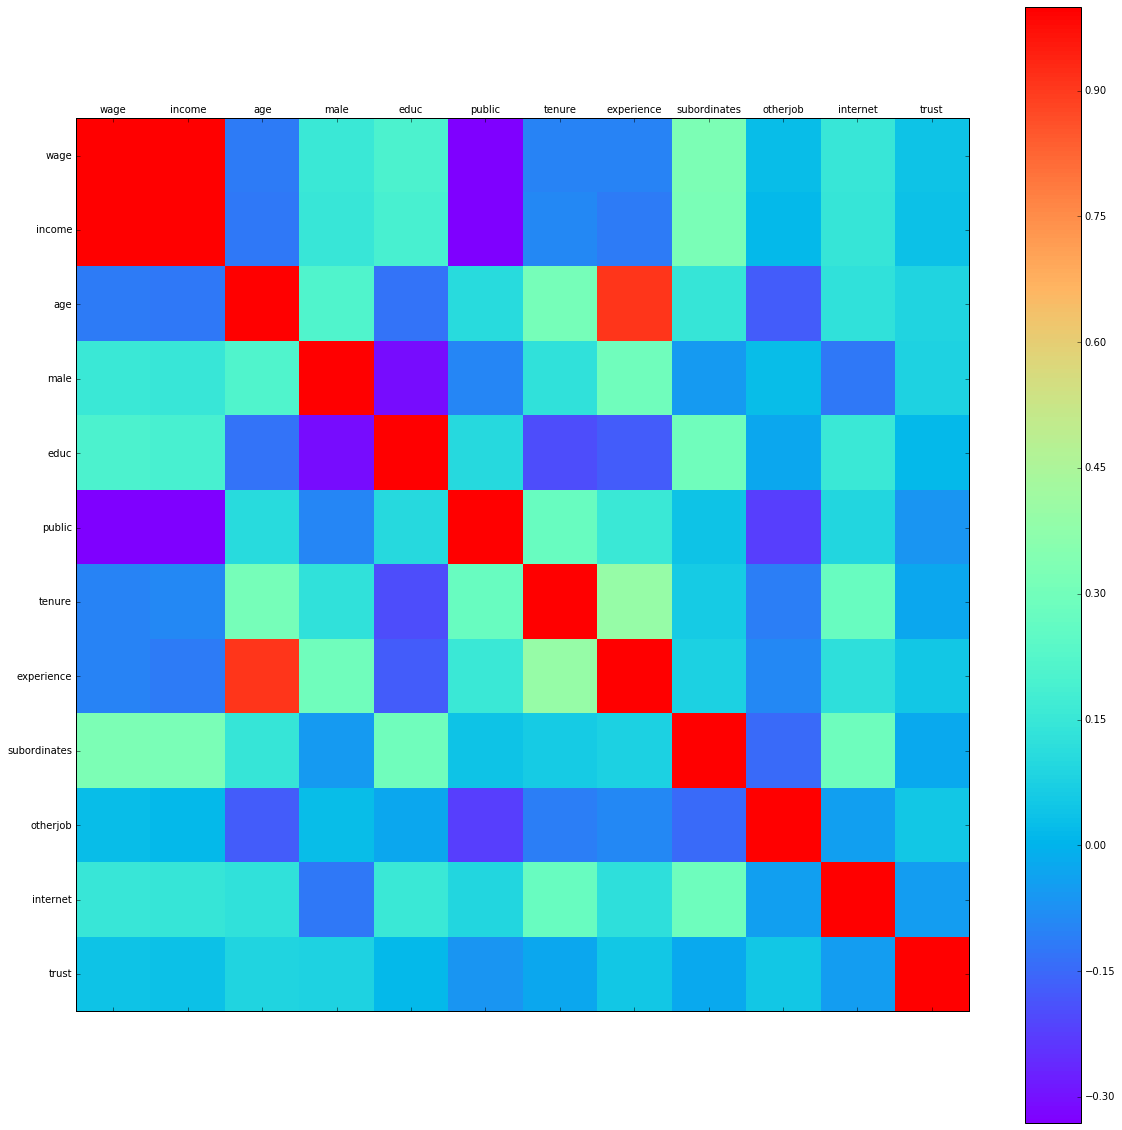

In [314]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

labels = list(data)[:-1]

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
cax = ax.matshow(x.corr(), cmap='rainbow')
fig.colorbar(cax)

ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()

### Интерпретация результатов

1) wage, income[0.997197]:

данные признаки коррелируют очень сильно, это говорит о том, что чем больше доход на основном месте работы, тем больше общий доход. Так же по средним значениям данных признаков(wage = 3951.180328, income = 4027.57377), кажется, что у большей части работников дополнительные доходы не значительны по сравнению с основными.

2) age, experience[0.910041]:

данные признаки коррелируют очень сильно, это можно объяснить тем, что человек в возрасте проработал больше, чем человек после университета. Соответственно, чем старше человек, тем больше стаж.

3) wage/income, internet[0.148, 0.146]:

корреляция слабая, но все же есть. Это может быть связано с тем, в селах есть одним из критериев приятия человека на работу является умение пользоваться интернетом. То есть, если умеешь, что у тебя будет выше заработная плата.

4) wage/income, educ[0.201, 0.19]:

умеренная корреляция, так как заработная плата зависит от уровня образования. То есть, как правило, студент, окончивший бакалавриат будет получать меньше студента, окончившего магистратуру.

5) wage/income, subordinates[0.326, 0.321]
умеренная корреляция, так как чем больше подчиненных, тем больше ответственность.

6) age, tenure[0.311820]:

умеренная корреляция, так чем старше человек, тем сильнее он привыкает к месту работы и уже не хочет менять, потому что это все же стресс.

7) educ, subordinates[0.296803]:

умеренная корреляция, так как чем выше образование у человека, тем скорее всего больше подчиненных у него будет.

8) public, wage\income[-0.330671, -0.329541]:

антикорреляция, то есть на люди, работающие на гос. предприятиях, получают меньше, чем в частных.

# 15 Предположите зависимость income или wage от каких-либо переменных в файле. Постройте графики, которые позволяют продемонстрировать эту зависимость.

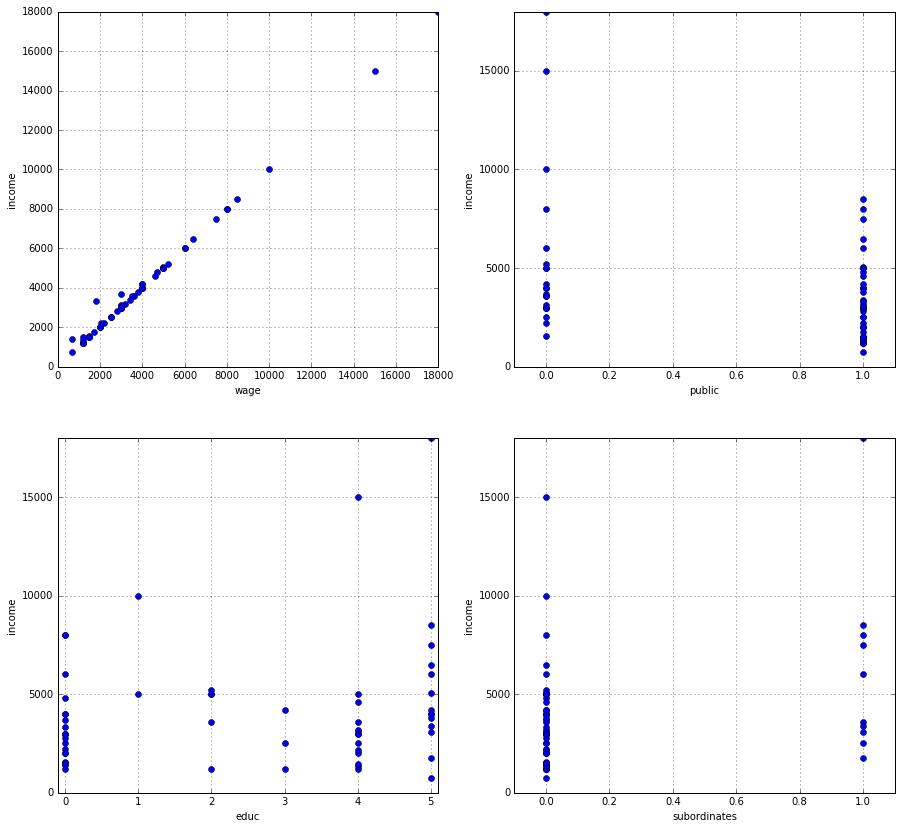

In [376]:
f, ax = plt.subplots(2, 2, figsize=(15, 14))
x, y = np.array(data['wage']), np.array(data['income'])

ax[0][0].plot(x, y, 'o')
ax[0][0].set_xlabel('wage')
ax[0][0].set_ylabel('income')
ax[0][0].grid()


x, y = np.array(data['educ']), np.array(data['income'])
ax[1][0].plot(x, y, 'o')
ax[1][0].set_xlabel('educ')
ax[1][0].set_ylabel('income')
ax[1][0].axis([x.min() - 0.1, x.max() + 0.1, 0, y.max() + 1])
ax[1][0].grid()


x, y = np.array(data['subordinates']), np.array(data['income'])
ax[1][1].plot(x, y, 'o')
ax[1][1].set_xlabel('subordinates')
ax[1][1].set_ylabel('income')
ax[1][1].axis([x.min() - 0.1, x.max() + 0.1, 0, y.max() + 1])
ax[1][1].grid()


x, y = np.array(data['public']), np.array(data['income'])
ax[0][1].plot(x, y, 'o')
ax[0][1].set_xlabel('public')
ax[0][1].set_ylabel('income')
ax[0][1].axis([x.min() - 0.1, x.max() + 0.1, 0, y.max() + 1])
ax[0][1].grid()

plt.show()

wage, income - линейная зависимость между зарплатой на основном месте работы и общими доходами.

income, public - отрицательная зависимость ежемесячных доходов и работы в государственном предприятии.

income, educ - заметна легкая зависимость, к примеру, люди, окончившие институт, университет или академию(соответствует цифра 5), в среднем имеют доход выше остальных.

income, subordinates - небольшое количество представителей, поддерживающих малый бизнес, показывает, что наблюдается слабая зависимость.

